In [889]:
import pandas as pd

df = pd.read_csv("csv files/population_total.csv")
df.head()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09


# 1 Making a pivot table

In [890]:
# drop null values
df.dropna(inplace=True)

#get rid of the .0 after number
df["year"] = df["year"].astype(int)

df_pt = df.pivot_table(index="year", columns = "country", values = "population")
df_pt.head()

country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis & Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1955,8270991.0,1419994.0,9774283.0,19754.0,9232.0,5043247.0,5783.0,49648.0,18789418.0,1563507.0,...,2372559.0,7277333.0,54921.0,6744695.0,28147443.0,7669.0,21147.0,4965574.0,2644976.0,3213286.0
1960,8996973.0,1636090.0,11057863.0,20123.0,13411.0,5454933.0,6032.0,54131.0,20481779.0,1874121.0,...,2538643.0,8526300.0,63689.0,8141841.0,32670039.0,8157.0,32761.0,5315355.0,3070776.0,3776681.0
1965,9956320.0,1896171.0,12550885.0,23672.0,18549.0,5770570.0,6361.0,58698.0,22159650.0,2211319.0,...,2694536.0,10116870.0,74270.0,9692278.0,37858951.0,8724.0,50970.0,5727751.0,3570464.0,4471177.0
1970,11173642.0,2150707.0,14464985.0,27363.0,24276.0,5890365.0,6771.0,64177.0,23880561.0,2525068.0,...,2809793.0,12080317.0,85377.0,11396393.0,43404793.0,8853.0,76874.0,6193384.0,4179067.0,5289303.0
1975,12689160.0,2411732.0,16607707.0,30052.0,30705.0,7024000.0,7159.0,62675.0,25865776.0,2832759.0,...,2830176.0,13857478.0,99859.0,13189509.0,48718189.0,9320.0,74954.0,6784695.0,4943283.0,6293875.0


In [891]:
# selecting some countries
df_pt = df_pt[["United States", "India", "China", "Indonesia", "Brazil"]]
df_pt.head()

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955,171685336.0,409880595.0,612241554.0,77273425.0,62533919.0
1960,186720571.0,450547679.0,660408056.0,87751068.0,72179226.0
1965,199733676.0,499123324.0,724218968.0,100267062.0,83373530.0
1970,209513341.0,555189792.0,827601394.0,114793178.0,95113265.0
1975,219081251.0,623102897.0,926240885.0,130680727.0,107216205.0


# 2 Data Visualization

## 2.1 Lineplot

<Axes: title={'center': 'Population vs Year (1955-2020)'}, xlabel='Year', ylabel='Population'>

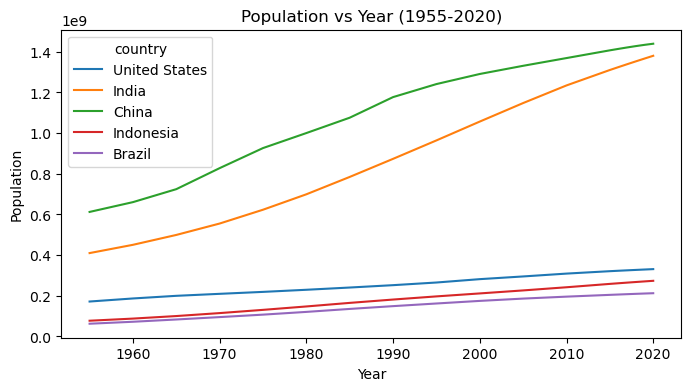

In [892]:
'''
kind: Type of plot to draw
xlabel: Label for the x-axis
ylabel: Label for the y-axis
title: Title of the plot
figsize: Size of the figure in inches (width (x), height (y))
'''
df_pt.plot(kind="line", xlabel="Year", ylabel="Population", title="Population vs Year (1955-2020)", figsize=(8,4))

## 2.2 Barplot

### 2.2.1 Single barplot

In [893]:
# selecting only one year
df_pt_2020 = df_pt[df_pt.index.isin([2020])]
df_pt_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [894]:
# transpose dataframe from rows to slumns or viceversa
df_pt_2020 = df_pt_2020.T

<Axes: title={'center': 'Population 2020'}, xlabel='Countries', ylabel='Population'>

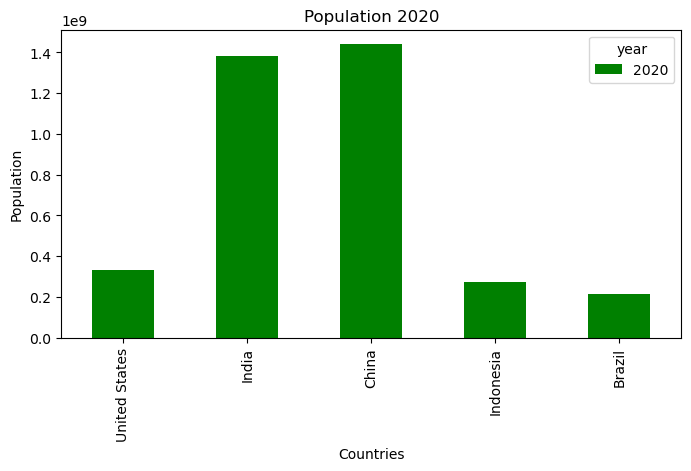

In [895]:
# making barplot
df_pt_2020.plot(kind="bar", xlabel="Countries", color="Green", ylabel="Population", title="Population 2020", figsize=(8,4))

### 2.2.2 Barplot grouped by 'n' variables

In [896]:
df_pt_sample = df_pt[df_pt.index.isin([1980,1990,2000, 2010,2020])]
df_pt_sample

country,United States,India,China,Indonesia,Brazil
year,,,,,
1980,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1990,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
2000,281710909.0,1.056576e+09,1.290551e+09,211513823.0,174790340.0
2010,309011475.0,1.234281e+09,1.368811e+09,241834215.0,195713635.0
2020,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


<Axes: title={'center': 'Population 2020'}, xlabel='Years', ylabel='Population'>

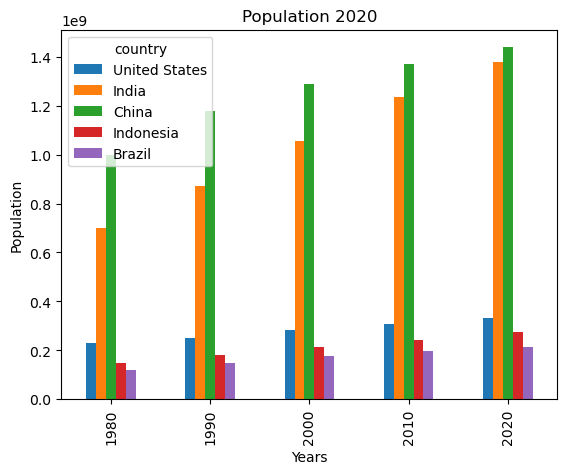

In [897]:
df_pt_sample.plot(kind="bar", xlabel="Years", ylabel="Population", title="Population 2020")

## 2.3 Piechart

<Axes: title={'center': 'Population %'}, ylabel='2020'>

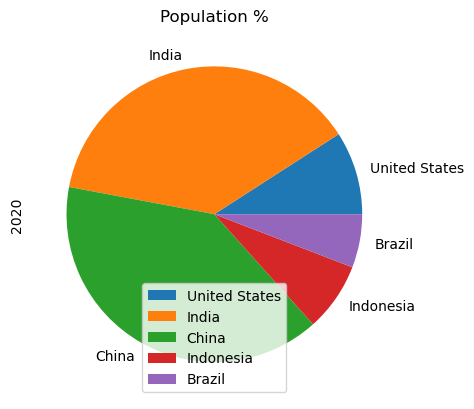

In [898]:
df_pt_2020.rename(columns={2020:'2020'}, inplace=True)
df_pt_2020.plot(kind="pie", y='2020', title="Population %")

## 2.4 Boxplot

### 2.4.1 Single boxplot

<Axes: ylabel='Population'>

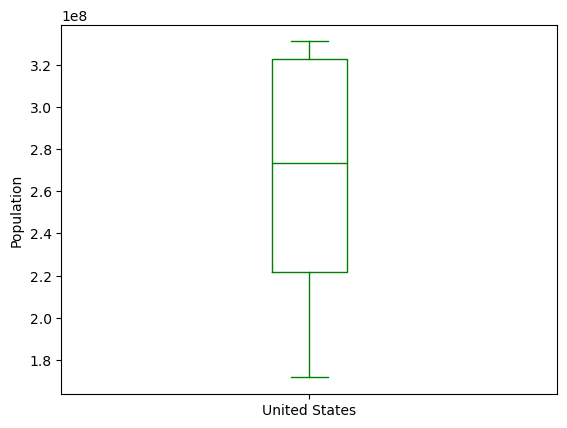

In [899]:
df_pt["United States"].plot(kind="box", color="green", 
                            ylabel="Population")

### 2.4.2 Multiple boxplot 

<Axes: ylabel='Population'>

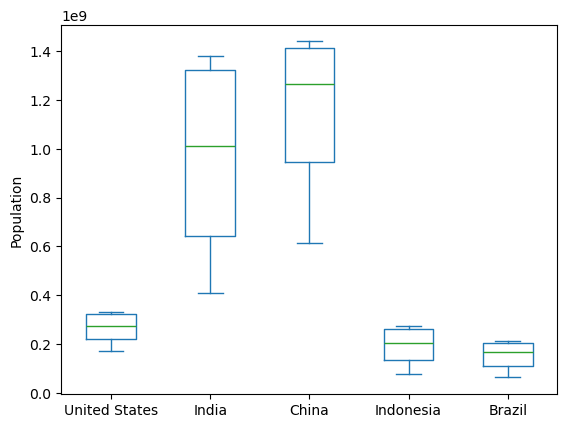

In [900]:
df_pt.plot(kind='box', ylabel='Population')

## 2.5 Histograms 

<Axes: ylabel='Frequency'>

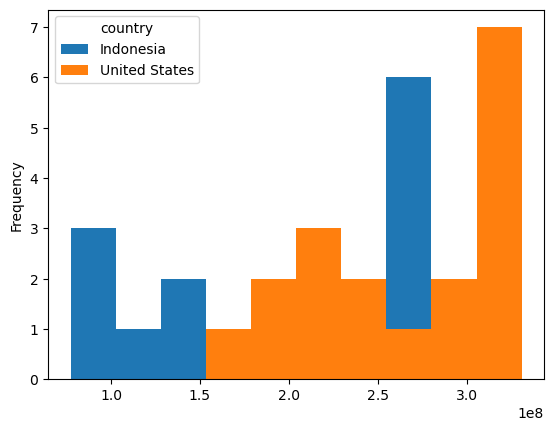

In [901]:
df_pt[["Indonesia", "United States"]].plot(kind="hist")

## 2.6 Scatterplot 

<Axes: xlabel='year', ylabel='population'>

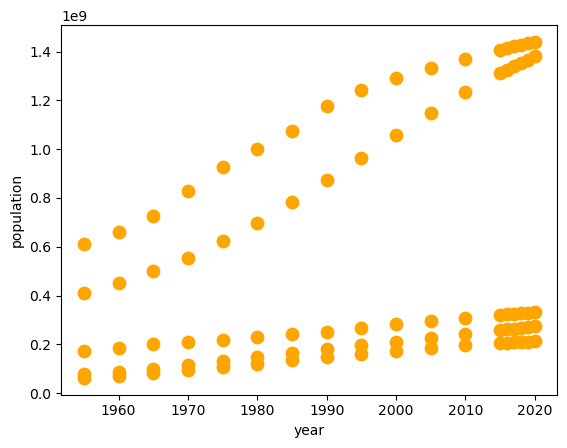

In [902]:
# select a sample of the raw data
df_sample = df[df["country"].isin(["United States", "India", "China", "Indonesia", "Brazil"])]
df_sample.plot(kind="scatter",
               x='year', 
               y='population',
               s = 80,
               color = "Orange")

## 2.6 Exporting plots

In [903]:
import matplotlib.pyplot as plt

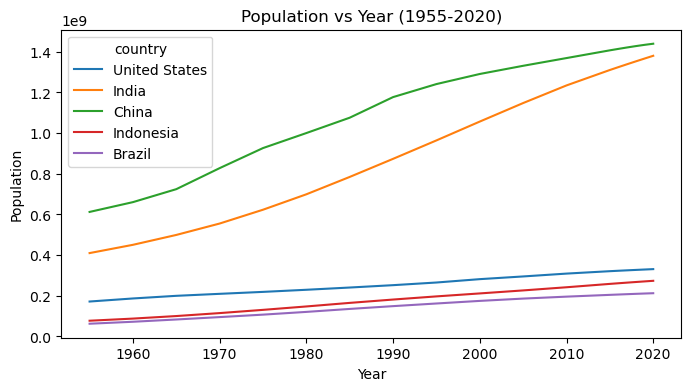

In [904]:
df_pt.plot(kind="line",
           xlabel="Year", ylabel="Population",
           title="Population vs Year (1955-2020)",
           figsize=(8,4))

#save plot
plt.savefig("csv files/my test.png")
#show plot
plt.show()

In [905]:
df_pt.to_excel('csv files/my_pivot_table.xlsx')

# 3 Interactive Visualizations: Plotly and Cufflinks 

In [924]:
# !pip install plotly
# !pip install cufflinks
import pandas as pd
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing='public', theme='ggplot', offline=True)

'''
dataframe.iplot() parameters
title: Plot title
xTitle: Label for x-axis
yTitle: Label for y-axis
dimensions: Sets plot size preset by pixels, [10,inf]

'''
df = pd.read_csv("csv files/population_total.csv")
df.dropna(inplace=True)
df["year"] = df["year"].astype(int) #get rid of the .0 after number
df_pt = df.pivot_table(index="year", columns = "country", values = "population")
df_pt = df_pt[["United States", "India", "China", "Indonesia", "Brazil"]]


## 3.1 Lineplot

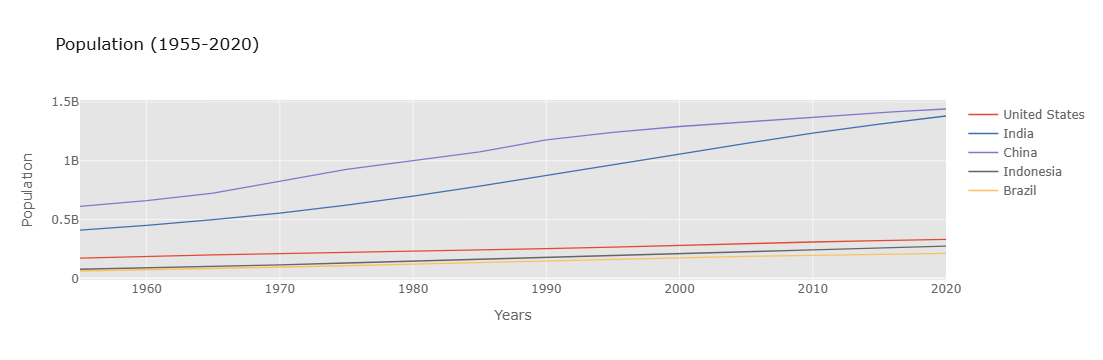

In [925]:
df_pt.iplot(kind="line",
            xTitle="Years", yTitle="Population", 
            title="Population (1955-2020)")

## 3.2 Barplot

In [926]:
df_pt_2020 = df_pt[df_pt.index.isin([2020])]
df_pt_2020 = df_pt_2020.T

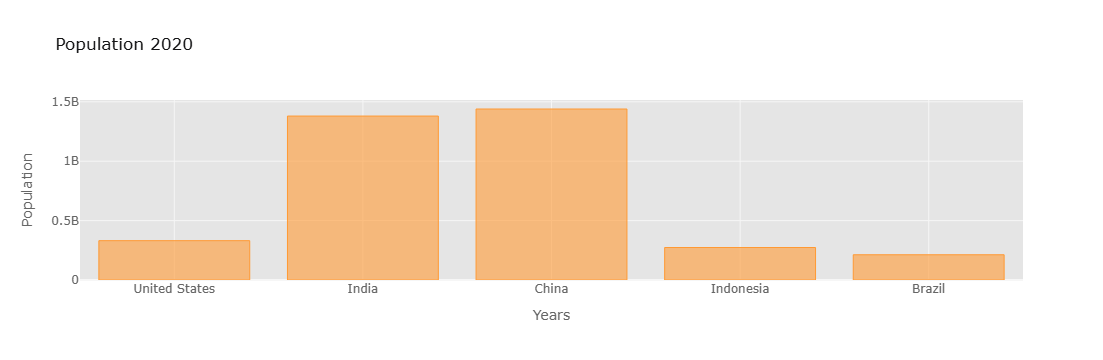

In [927]:
df_pt_2020.iplot(kind="bar", color="orange",
                 xTitle="Years", yTitle="Population",
                 title="Population 2020")

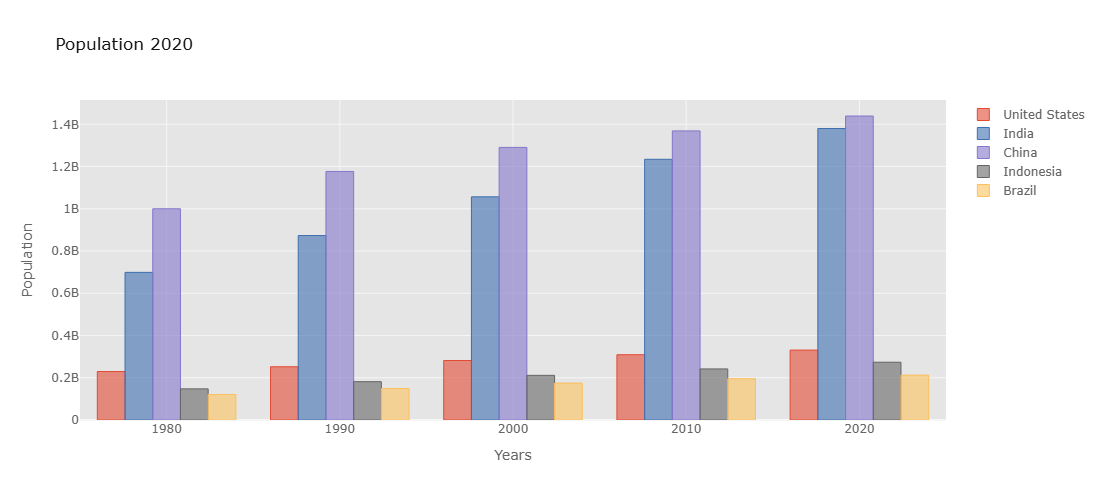

In [928]:
df_pt_sample = df_pt[df_pt.index.isin([1980,1990,2000, 2010,2020])]
df_pt_sample.iplot(kind="bar",
                 xTitle="Years", yTitle="Population",
                 title="Population 2020",
                  dimensions=[1000,500])

## 3.3 Piechart

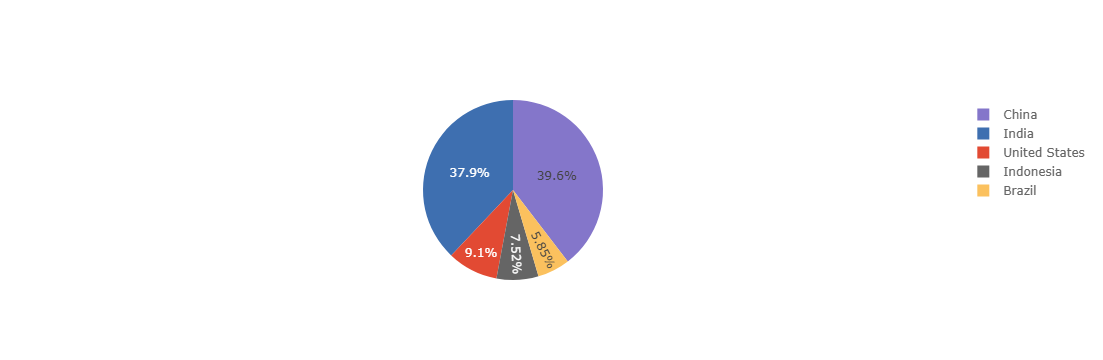

In [929]:
# changing column name
df_pt_2020.rename(columns={2020:'2020'}, inplace=True)
#need to set country index to a column
df_pt_2020 = df_pt_2020.reset_index()

df_pt_2020.iplot(kind='pie', values='2020', labels='country')

## 3.4 Boxplot

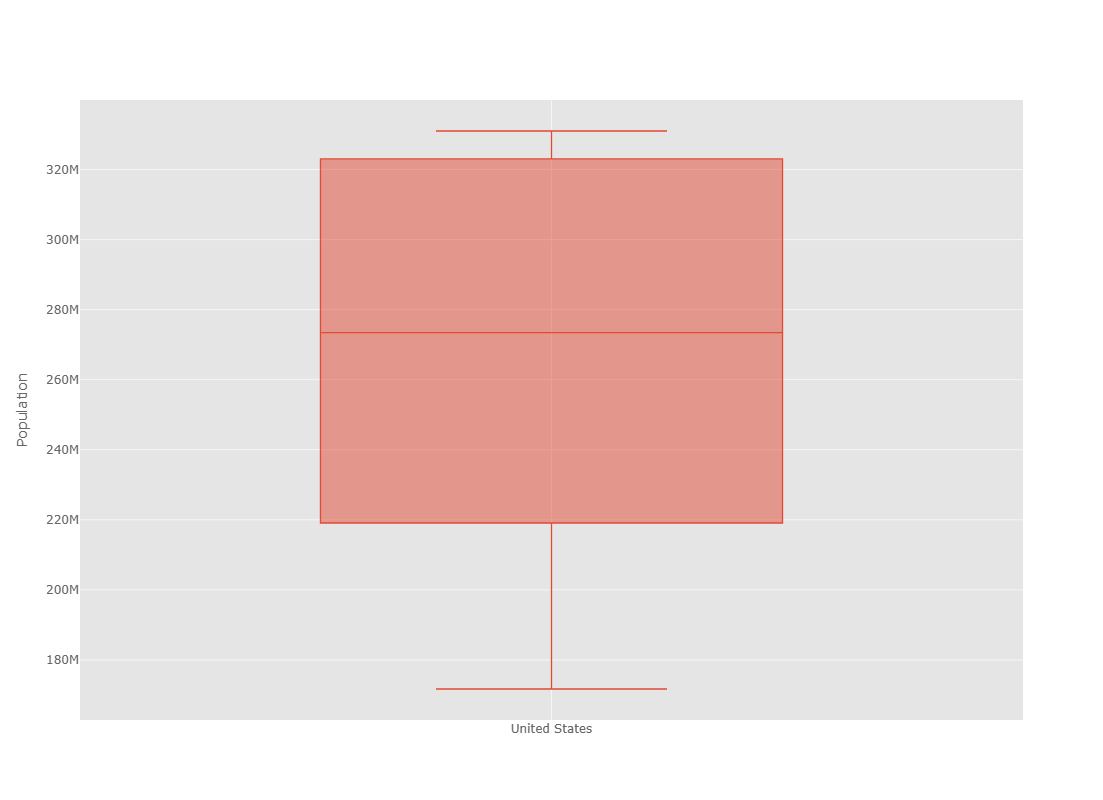

In [935]:
df_pt['United States'].iplot(kind="box", dimensions=[500,800], yTitle="Population")

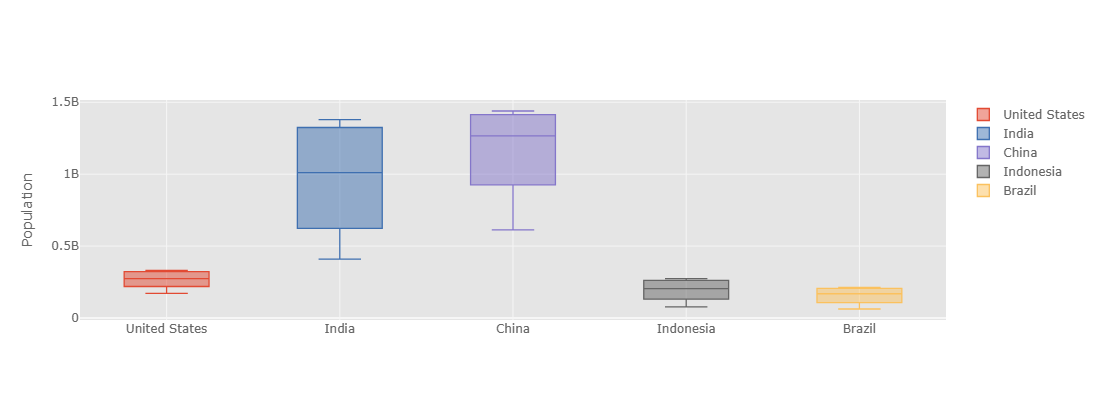

In [955]:
df_pt.iplot(kind="box", dimensions=[400,400], yTitle="Population")

## 3.5 Histogram

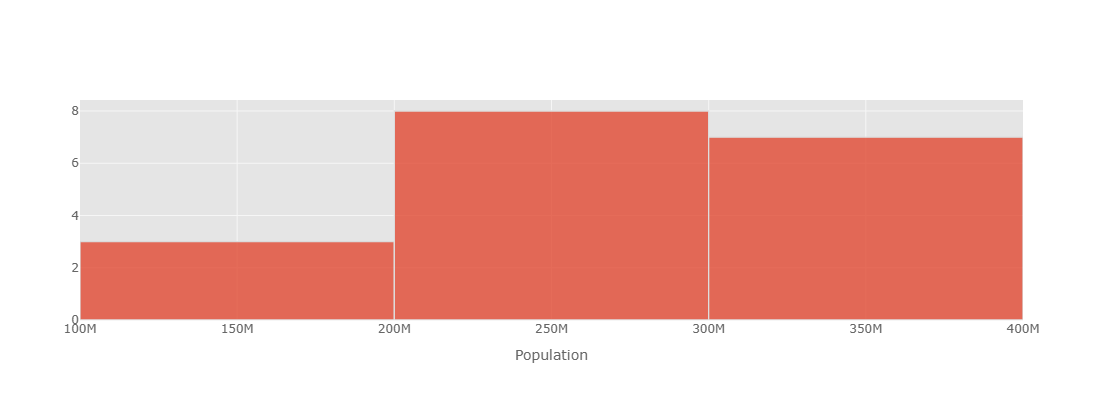

In [954]:
df_pt['United States'].iplot(kind="hist", xTitle="Population", dimensions=[400,400], bins=3)

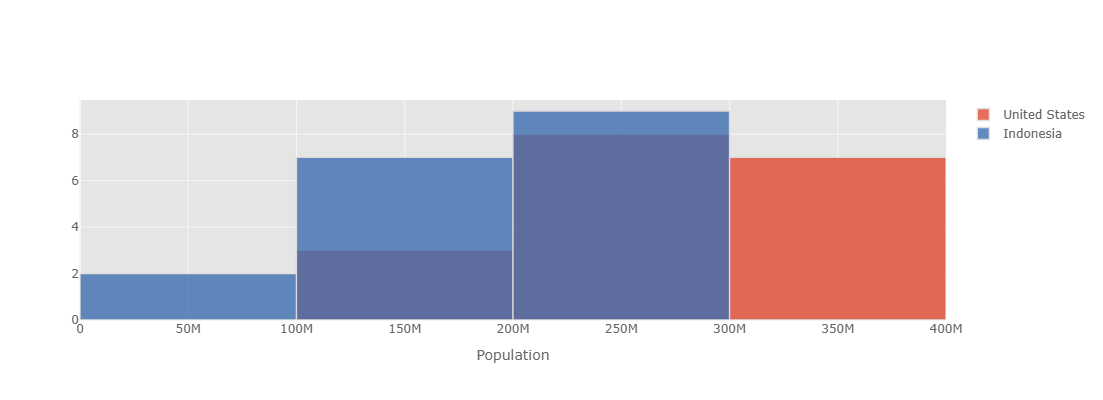

In [956]:
df_pt[['United States', "Indonesia"]].iplot(kind="hist", xTitle="Population", dimensions=[400,400], bins=3)

## 3.5 Scatterplot

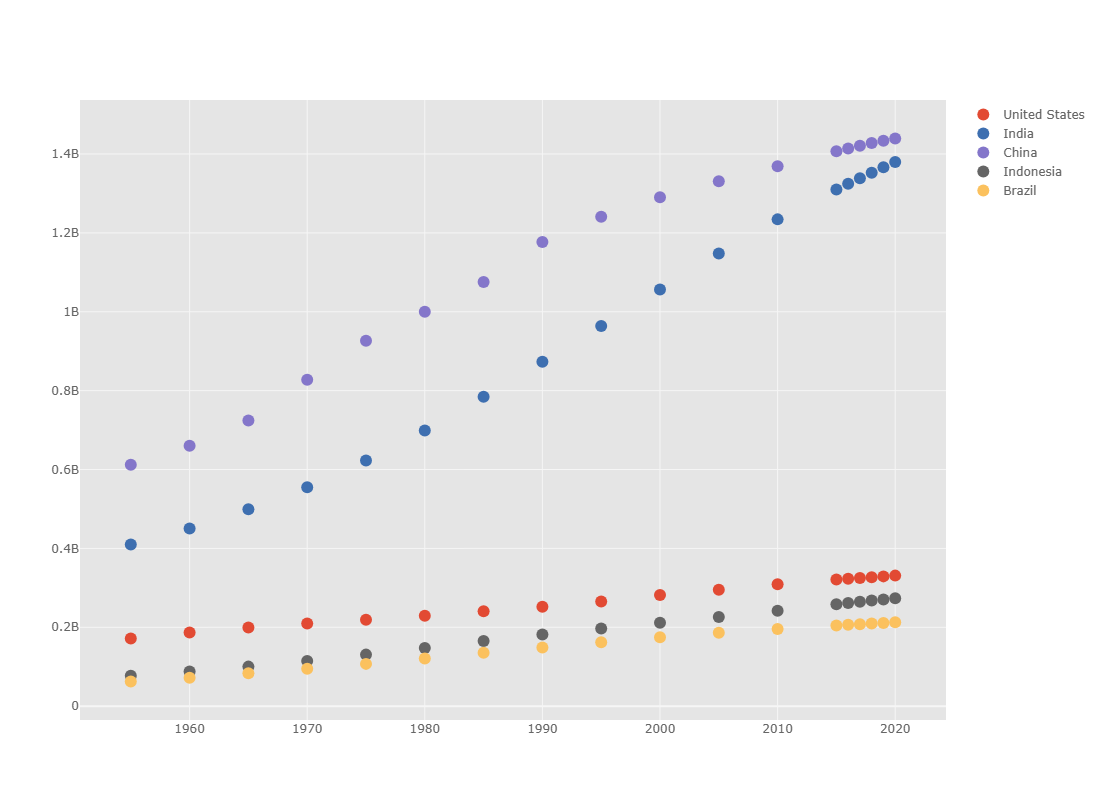

In [962]:
df_pt.iplot(kind="scatter", mode="markers", dimensions=[800, 800])